In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import datetime as dt 
import matplotlib.patches as mpatches
import os
import numpy as np


In [2]:
# Twitter API Keys
consumer_key = '8AefgOZzGBnGpufQq3Ih7eihb'
consumer_secret = "ZxXBEu3EXgIfpxJEL3C8J1lP3ciSJttu9Ur7Zn7jZYNrlk6y44"
access_token = "3145236745-enlpCPm9qLAgo33pBgFm4RFeyrg0btxeC4UZpUJ"
access_token_secret = "5qDGBAwJGSdHKA0e3N18fubbcGHQ6eVxHIIz3h7TjDw4x"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#BBC, CBS, CNN, Fox, and New York times.
channel_list = ['BBC','CBS','CNN','FoxNews','NYTimes']
tweets = []
tweeting_channel = []
tweet_time = []

In [4]:
for each in channel_list:
    all_info = api.user_timeline(screen_name = each, count = 100)
    for tweet in all_info:
        #print(each + ": " + tweet['text'])
        tweets.append(tweet['text'])
        tweet_time.append(tweet["created_at"])
        

        tweeting_channel.append(each)

    #tweets.append(all_info['text'])
    
#pretty_tweets = json.dumps(all_info, sort_keys=True, indent=4)
#print(pretty_tweets)
#print(all_info)

In [5]:
tweet_df = pd.DataFrame()
tweet_df["Channel"] = tweeting_channel
tweet_df["Tweets"] = tweets
tweet_df["Time"] = tweet_time


In [6]:
tweet_df.head()


,Channel,Tweets,Time
0,BBC,RT @BBCOne: SO. MUCH. CUTE. 😍\n#Attenboroughan...,Sun Dec 10 21:34:02 +0000 2017
1,BBC,RT @BBCEarth: 'Never before have we had such a...,Sun Dec 10 21:02:27 +0000 2017
2,BBC,🌹@DuaLipa performing 'Homesick' was a complete...,Sun Dec 10 21:00:06 +0000 2017
3,BBC,RT @BBCEarth: 'What shocks me ...is how fast t...,Sun Dec 10 20:58:15 +0000 2017
4,BBC,"RT @BBCOne: If we don’t act, coral reefs could...",Sun Dec 10 20:57:07 +0000 2017


In [7]:
compound = []
pos = []
neu = []
neg = []

for x in tweet_df["Tweets"]:
    scores = analyzer.polarity_scores(x)
    #print(scores)    
    compound.append(scores['compound'])
    pos.append(scores['pos'])
    neu.append(scores['neu'])
    neg.append(scores['neg'])
    
tweet_df["Compound Score"] = compound
tweet_df["Positive Score"] = pos
tweet_df["Negative Score"] = neg
tweet_df["Neutral Score"] = neu

tweet_df.to_csv("Tweets_Sentiment.csv")

tweet_df.head()

,Channel,Tweets,Time,Compound Score,Positive Score,Negative Score,Neutral Score
0,BBC,RT @BBCOne: SO. MUCH. CUTE. 😍\n#Attenboroughan...,Sun Dec 10 21:34:02 +0000 2017,0.6915,0.440,0.000,0.560
1,BBC,RT @BBCEarth: 'Never before have we had such a...,Sun Dec 10 21:02:27 +0000 2017,0.0000,0.000,0.000,1.000
2,BBC,🌹@DuaLipa performing 'Homesick' was a complete...,Sun Dec 10 21:00:06 +0000 2017,0.4391,0.145,0.000,0.855
3,BBC,RT @BBCEarth: 'What shocks me ...is how fast t...,Sun Dec 10 20:58:15 +0000 2017,-0.3818,0.000,0.126,0.874
4,BBC,"RT @BBCOne: If we don’t act, coral reefs could...",Sun Dec 10 20:57:07 +0000 2017,0.0000,0.000,0.000,1.000


In [8]:
tweet_df['Tweets Ago'] = tweet_df.groupby('Channel')['Time'].rank(ascending=False)


In [9]:
#assigning colors
tweet_df["coloring"]= tweet_df["Channel"]
tweet_df.loc[:, 'coloring'].replace(["BBC", "CBS", "CNN", "FoxNews", "NYTimes"], ["lightskyblue", "green", "red", "blue","gold"],
                                  inplace=True)
colors= tweet_df["coloring"].values


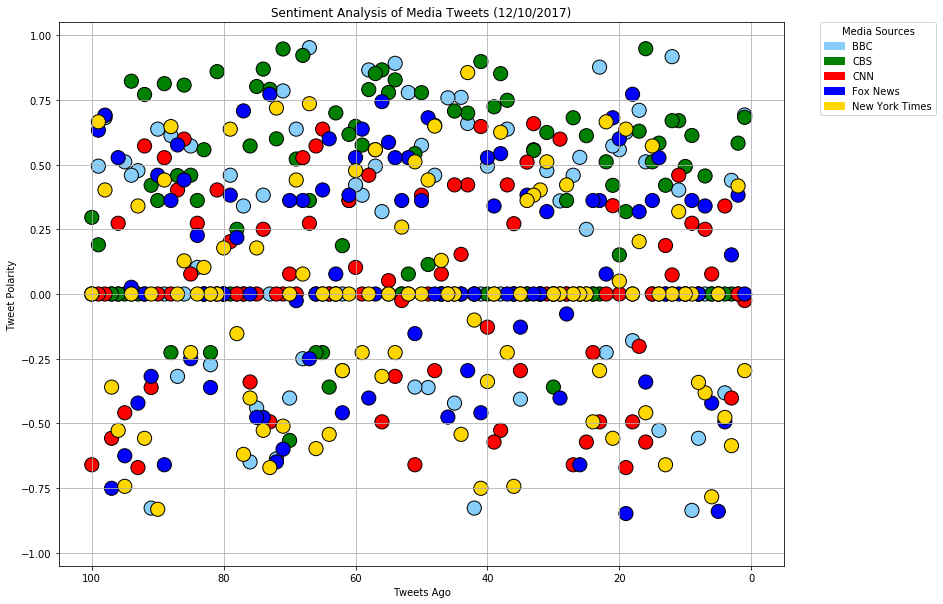

In [10]:
#creating date
date = dt.date.today
date = dt.datetime.today().strftime("%m/%d/%Y")


plt.figure(figsize=(13,10))
#plt.colors

plt.scatter(tweet_df['Tweets Ago'], tweet_df['Compound Score'], marker='o',
            c=colors,edgecolors='black',s=200)



one = mpatches.Patch(color='lightskyblue', label='BBC')
two = mpatches.Patch(color='green', label='CBS')
three = mpatches.Patch(color='red', label='CNN')
four = mpatches.Patch(color='blue', label='Fox News')
five = mpatches.Patch(color='gold', label='New York Times')

# Incorporate the other graph properties
plt.title('Sentiment Analysis of Media Tweets ('+ date+")")
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.grid(True)
plt.xlim(105, -5)
plt.ylim(-1.05, 1.05)

plt.legend(title="Media Sources", handles=[one, two, three, four, five],
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Save the figure
plt.savefig('Sentiment_analysis_scatter_plot.png')

# Show plot
plt.show()

In [11]:
tweet_df_new = tweet_df.groupby("Channel")
tweet_df_new = tweet_df_new["Compound Score"].mean()
tweet_df_new = pd.DataFrame(tweet_df_new)
tweet_df_new.head()


,Compound Score
Channel,
BBC,0.170004
CBS,0.374197
CNN,0.022858
FoxNews,0.082324
NYTimes,-0.012360


In [12]:
#assigning colors
tweet_df_new["coloring"]= tweet_df_new.index
tweet_df_new.loc[:, 'coloring'].replace(["BBC", "CBS", "CNN", "FoxNews", "NYTimes"], ["lightskyblue", "green", "red", "blue","gold"],
                                  inplace=True)
colors2= tweet_df_new["coloring"].values
ticks=["BBC", "CBS", "CNN", "Fox", "NYT"]

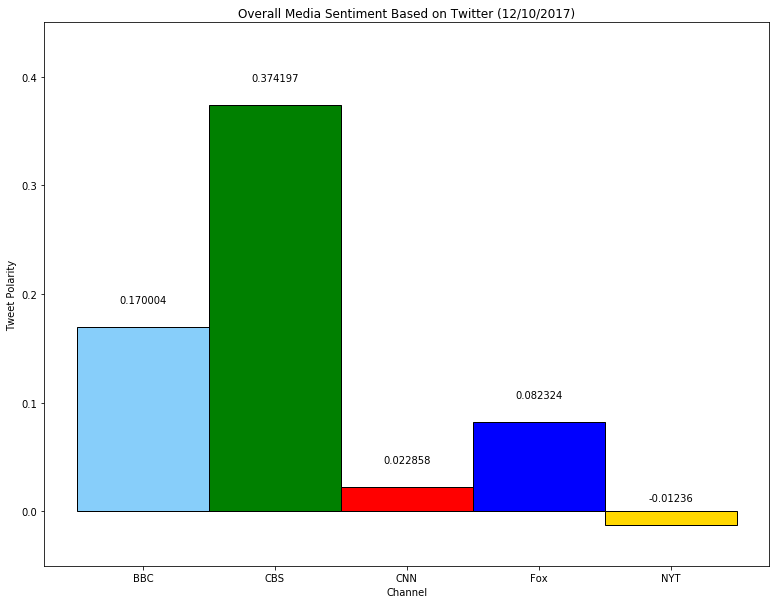

In [13]:
fig, ax = plt.subplots()

rects = ax.bar(tweet_df_new.index,tweet_df_new["Compound Score"],edgecolor=['black']*len(x),color=colors2,
       tick_label=ticks, width=1.0)

plt.ylim(-0.05, 0.45)

plt.title('Overall Media Sentiment Based on Twitter ('+ date+")")
plt.ylabel('Tweet Polarity')
plt.xlabel('Channel')

labels = tweet_df_new["Compound Score"]


for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.02, label, ha='center', va='bottom')

    fig = plt.gcf()
fig.set_size_inches(13,10)

plt.savefig('Overall_Sentiment_bar_plot.png')

plt.show()